# 4.9 Intro to Data Visualization with Python

## This script contains the following points:

#### 1. Import libraries and dataframe
#### 2. Create a histogram of the “order_hour_of_day” column
#### 3. Create a bar chart from the “loyalty_flag” column
#### 4. Check for a difference in expenditure in “prices” column
#### 5. Analysis of customer demographics
#### 6. Connection between age and income, scatterplot

#### 1. Import libraries and dataframe

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path and import dataframe
path = r'C:\Users\olilo\OneDrive\Dokumente\CF\Data Analytics Immersion_Week 8-9\2023-08-28 Instacart Basket Analysis'
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust.pkl'))

In [3]:
# Output check
ords_prods_cust.shape

(32404859, 35)

In [4]:
ords_prods_cust.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,name,surname,gender,state,age,date_joined,dependants_number,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#### 2.Create a histogram of the “order_hour_of_day” column

In [5]:
# Finding mximum number of days for bias
max_order_hour_of_day = ords_prods_cust['order_hour_of_day'].max()

In [6]:
print(max_order_hour_of_day)

23


Text(0, 0.5, 'Frequency')

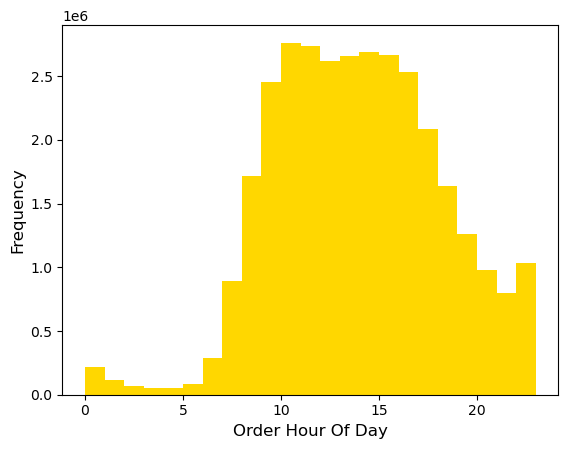

In [7]:
# Creating a histogram
hist_ord = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 23, color = 'gold')
plt.xlabel("Order Hour Of Day", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

In [8]:
# Export the visualization it outside
hist_ord.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ord.png'))

The histogram shows that the frequency of orders in the morning is low, increasing before noon, the highest frequency of food orders takes place in the afternoon and falls towards the evening.
The schedule may look like this due to the ordering of food during breaks and then after working hours

#### 3. Create a bar chart from the “loyalty_flag” column

Text(0.5, 1.0, 'Number of orders in loyalty criteria groups')

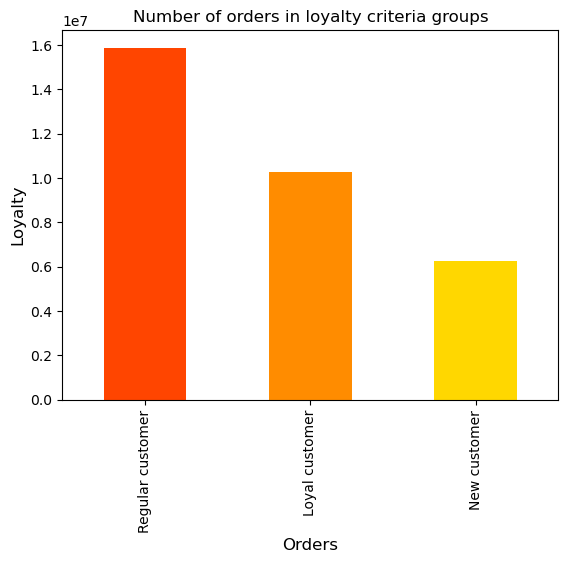

In [9]:
# Creating a bar chart
bar_loyal = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = [ "orangered", "darkorange", "gold"]) 
plt.xlabel("Orders", fontsize=12)
plt.ylabel("Loyalty", fontsize=12)  
plt.title("Number of orders in loyalty criteria groups", fontsize=12)

In [10]:
# Export the visualization it outside
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_ord.png'))

To the contrary of loyal customers, the greatest profit for the company comes from regular customers

#### 4. Check for a difference in expenditure in “prices” column

In [11]:
# Create a sample, split into two dataframes at a 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [12]:
# Sample 70% of dataframe
big = ords_prods_cust[dev]

In [13]:
# Sample 30% of dataframe
small = ords_prods_cust[~dev]

In [14]:
# Check the results
len(ords_prods_cust)

32404859

In [15]:
# Check the results
len(big) + len(small)

32404859

In [16]:
# Reducing your samples to only those columns necessary for the chart
df_2 = small[['prices', 'order_hour_of_day']]

Text(0.5, 1.0, 'Fifference in expenditure depending on the order hour of the day')

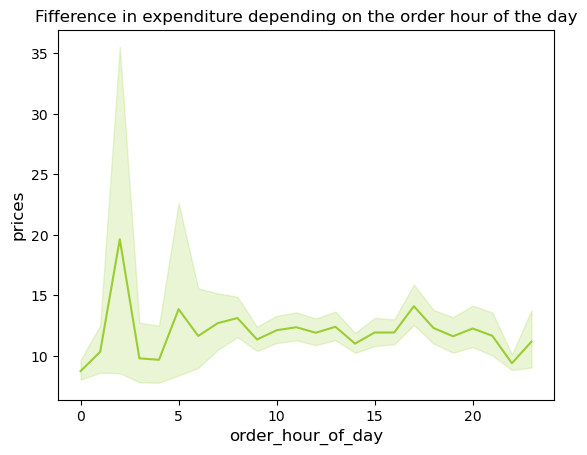

In [17]:
# Create a line chart from the sample
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices', color = 'yellowgreen')
plt.xlabel("order_hour_of_day", fontsize=12)
plt.ylabel("prices", fontsize=12)  
plt.title("Difference in expenditure depending on the order hour of the day", fontsize=12)

In [18]:
# Export the visualization it outside
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_hour_prices.png'))

There is no correlation between prices and order hour of day

#### 5. Analysis of customer demographics

In [19]:
# Printing the numbers with count conclusion of 
ords_prods_cust['fam_status'].value_counts().sort_index()

fam_status
divorced/widowed                     2771812
living with parents and siblings     1550603
married                             22756753
single                               5325691
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Users by Marital Status')

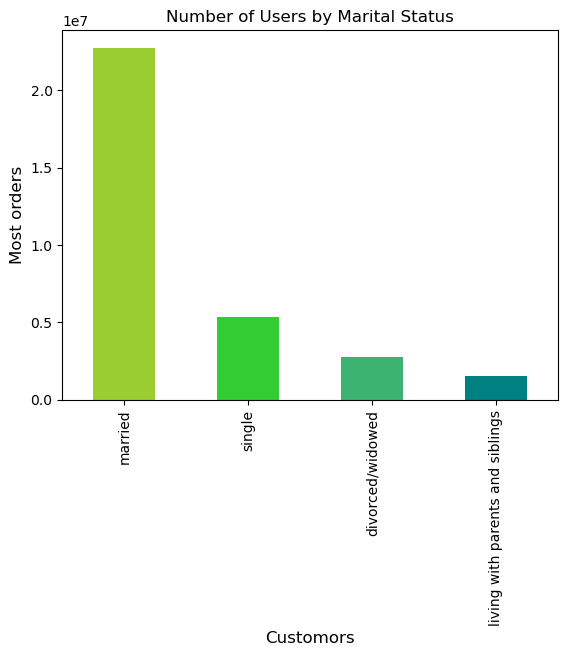

In [20]:
# Bar chart as secound output
status = ords_prods_cust['fam_status'].value_counts().plot.bar(color = ["yellowgreen", "limegreen", "mediumseagreen", "teal"])
plt.xlabel("Customors", fontsize=12)
plt.ylabel("Most orders", fontsize=12)  
plt.title("Number of Users by Marital Status", fontsize=12)

Most customers are married people, and they are the majority who bring more income to the company

In [21]:
# Find min and max in age column
ords_prods_cust['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [27]:
# Create a Age flag column
ords_prods_cust.loc[ords_prods_cust['age'] >= 80, 'age_groups'] = '80+'
ords_prods_cust.loc[(ords_prods_cust['age'] <= 79) & (ords_prods_cust['age'] >= 70), 'age_groups'] = '70-79'
ords_prods_cust.loc[(ords_prods_cust['age'] <= 69) & (ords_prods_cust['age'] >= 60), 'age_groups'] = '60-69'
ords_prods_cust.loc[(ords_prods_cust['age'] <= 59) & (ords_prods_cust['age'] >= 50), 'age_groups'] = '50-59'
ords_prods_cust.loc[(ords_prods_cust['age'] <= 49) & (ords_prods_cust['age'] >= 40), 'age_groups'] = '40-49'
ords_prods_cust.loc[(ords_prods_cust['age'] <= 39) & (ords_prods_cust['age'] >= 30), 'age_groups'] = '30-39'
ords_prods_cust.loc[(ords_prods_cust['age'] <= 29) & (ords_prods_cust['age'] >= 20), 'age_groups'] = '20-29'
ords_prods_cust.loc[(ords_prods_cust['age'] <= 19) & (ords_prods_cust['age'] >= 10), 'age_groups'] = '10-19'

In [28]:
# Output check, Age groups flag
ords_prods_cust['age_groups'].value_counts(dropna = False)

age_groups
40-49    5109237
30-39    5073751
20-29    5070361
50-59    5064175
70-79    5055461
60-69    4987264
80+      1024530
10-19    1020080
Name: count, dtype: int64

In [46]:
ords_prods_cust.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,name,surname,gender,state,age,date_joined,dependants_number,fam_status,income,age_groups
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39


In [29]:
#Create a subset of 'n_dependants' and 'age'
df_3 = small[['dependants_number', 'age']]

Text(0.5, 1.0, 'Relationship between age and number of dependents')

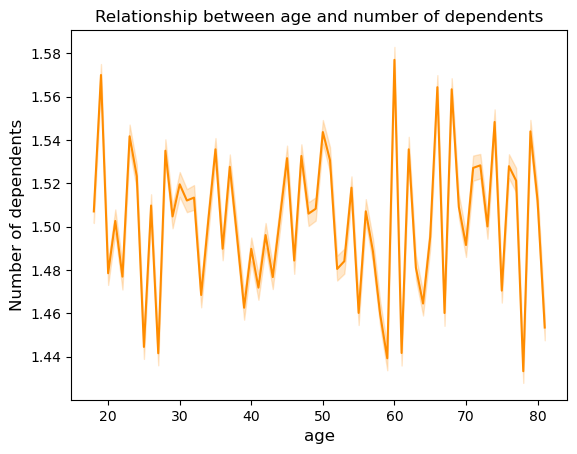

In [31]:
# Create a line chart of age vs number of dependents from sample
line_dep_age = sns.lineplot(data = df_3, x = 'age',y = 'dependants_number',  color ="darkorange")
plt.xlabel("age", fontsize=12)
plt.ylabel("Number of dependents", fontsize=12)  
plt.title("Relationship between age and number of dependents", fontsize=12)

In [32]:
# Export the visualization it outside
line_dep_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dep_age.png'))

There is no noticeable relationship between age and dependants number

#### 6. Connection between age and income, scatterplot

In [34]:
# Create a dictionary to map age groups to colors
colors = {"10-19": "orangered", "20-29": "darkorange", "30-39": "gold", "40-49":"yellowgreen", "50-59":"limegreen", "60-69":"mediumseagreen", "70-79":"teal", "80+":"dimgrey" }

In [38]:
#Create a subset of 'n_dependants' and 'age'
df_4 = small[['income', 'age']]

Text(0.5, 1.0, 'Income by Age')

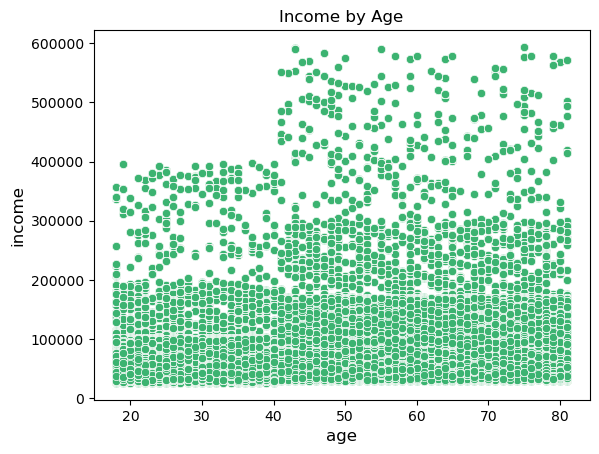

In [55]:
# Create a scatterplot using the sns.scatterplot() function 
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_4, color = "mediumseagreen")
plt.xlabel("age", fontsize=12)
plt.ylabel("income", fontsize=12)  
plt.title("Income by Age", fontsize=12)

In [56]:
# Export the visualization it outside
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

The income surpass above 400,000$ by the customer age 40+

In [48]:
# Create a sample, split into two dataframes at a 70/30 ratio
np.random.seed(4)
dev2 = np.random.rand(len(ords_prods_cust)) <= 0.7

In [49]:
# Sample 70% of dataframe
big2 = ords_prods_cust[dev2]
# Sample 30% of dataframe
small2 = ords_prods_cust[~dev2]

In [52]:
# Create a subset of 'income' and 'age_groups' for scatterplot
df_5 = small2[['income', 'age_groups']]

In [58]:
# Sort the age_groups column
df_5.loc[:, "age_groups"] = df_5["age_groups"].sort_values()

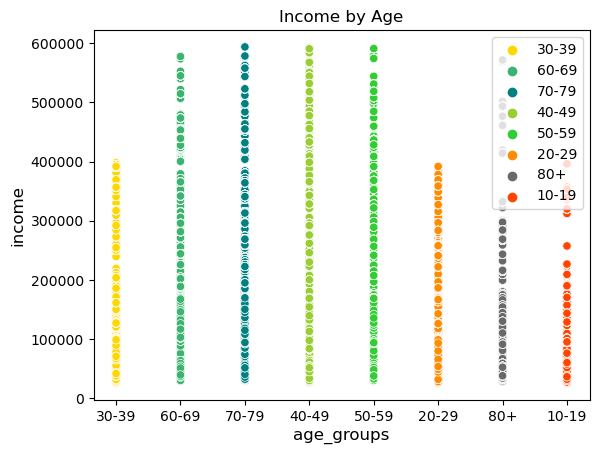

In [62]:
# Create a scatterplot
scatter_age_groups_income = sns.scatterplot(x = 'age_groups', y = 'income', data = df_5, hue='age_groups', palette=colors)
plt.xlabel("age_groups", fontsize=12)
plt.ylabel("income", fontsize=12)  
plt.title("Income by Age", fontsize=12)
# Move the legend to the side
plt.legend(loc="upper right")

In [54]:
# Export the visualization it outside
scatter_age_groups_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_groups_income.png'))

C:\Users\olilo\AppData\Local\Temp\ipykernel_1456\4180636230.py:2: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  scatter_age_groups_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_groups_income.png'))
